<a href="https://colab.research.google.com/github/oscarastuaq/Predicciones_Ventas_Retail/blob/main/Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Explora los datos: 
¿Qué necesitas para limpiar estos datos?

¿Hay valores faltantes en el conjunto de datos? 
Es posible que algunas tiendas no informen de todos los datos a causa de problemas técnicos u otros problemas. De ser así, trata con ello apropiadamente.

Aquí hay algunos recursos para que consideres maneras más avanzadas para lidiar con valores faltantes en tu conjunto de datos (revisa los recursos Pandas adicionales opcionales al final de este capítulo para más recursos sobre esto):

1. Datos faltantes, sus tipos y métodos estadísticos para lidiar con ellos

2. 6 formas diferentes de compensar los valores faltantes en un conjunto de datos

3. Valores en un conjunto de datos

Tratamiento de datos fdaltantes: 
1. Supuestos y métodos clave para el análisis aplicados


2. ¿Cuáles son algunos resúmenes estadísticos, información agregada, u otras tendencias que puedes observar en los datos usando Pandas?


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
filename = '/content/drive/My Drive/CodingDojo/Proyecto_1/sales_predictions.csv'
StoreSales = pd.read_csv(filename)

#Examinamos las primeras 5 filas.
StoreSales.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Examinamos las ultimas 5 filas.
StoreSales.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
# df.shape y df.info() nos dan informacion sobre el numero de filas y columnas en el dataframe, 
#los tipos de datos y data perdida.
StoreSales.shape
# Resultado: 8.523 filas con 12 columnas

(8523, 12)

In [ ]:
# con la instruccion info podemos ver en cual columna faltan datos: 
# por ejemplo de los 8523 rows la columna Item_Weight tiene solo 7060 rows con valores. Y 1463 rows con NaN
# tambien la columna Outlet_Size tiene solo 6113 rows con datos. Y  2410 rows con NaN.
StoreSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Verifica los tipos de datos de la columna usando el atributo dtypes
StoreSales.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# verificar cuales valores son NaN o nulos (Null)
StoreSales.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Verificar si hay datos faltantes por columna
StoreSales.isnull().any()


Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [ ]:
# Numero de datos faltantes por columna
StoreSales.isnull().sum() # Tenemos dos columnas con datos NaN Item_Weight y Outlet_Size


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Veamos ahora  para cada tipo de Outlet (Outlet_Type = Supermarket Type1 / Supermarket Type2 / Supermarket Type3 / Grocery Store )
  # cuantos datos son NaN en relacion a la columna Item_Weight  ?

pd.crosstab(index=StoreSales.Outlet_Type, columns=StoreSales.Item_Weight.isna(), normalize=False)

# Podemos observar que para Grocery Store tenemos 528 datos NaN y que para Supermarket Type 3 tenemos 935 datos NaN
# Adicionalmente podemos observar que para el tipo Supermarket Type 3 No tenemos ningun dato en la columna Item_Weight. 

Item_Weight,False,True
Outlet_Type,,
Grocery Store,555,528
Supermarket Type1,5577,0
Supermarket Type2,928,0
Supermarket Type3,0,935


In [ ]:
# 2. remove duplicates
# Metodo para detectar los datos duplicados. 
StoreSales.duplicated()  # No tenemos datos duplicados

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
# Existe alguna relacion entre los datos faltantes y el tamano de Supermercado?

pd.crosstab(index=StoreSales.Outlet_Size, columns = StoreSales.Item_Weight.isna(), normalize=False)

# Al parecer en los Supermercados tamano pequeno y medio no estan llegando todos los datos para la columna Item_Weight.

Item_Weight,False,True
Outlet_Size,,
High,932,0
Medium,1858,935
Small,1860,528


In [ ]:
# Cual Item tiene mayor  porcentaje de Visualizacion por Nivel donde se ubica dentro del Tipo de Supermercado y su Tamano.

#pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
pd.crosstab(index = StoreSales.Item_Type,  columns=[  StoreSales.Outlet_Type, StoreSales.Outlet_Size, StoreSales.Outlet_Location_Type , StoreSales.Item_Visibility.sum()  ],  normalize='columns' )

# se debe ordenar por una columna de forma descendente

Outlet_Type           Grocery Store  ... Supermarket Type3
Outlet_Size                   Small  ...            Medium
Outlet_Location_Type         Tier 1  ...            Tier 3
col_3                    563.643281  ...        563.643281
Item_Type                            ...                  
Baking Goods               0.081439  ...          0.073797
Breads                     0.030303  ...          0.033155
Breakfast                  0.018939  ...          0.011765
Canned                     0.071970  ...          0.077005
Dairy                      0.092803  ...          0.071658
Frozen Foods               0.092803  ...          0.095187
Fruits and Vegetables      0.138258  ...          0.149733
Hard Drinks                0.015152  ...          0.024599
Health and Hygiene         0.056818  ...          0.064171
Household                  0.098485  ...          0.105882
Meat                       0.060606  ...          0.059893
Others                     0.032197  ...          0.016043
Seafood                    0.011364  ...          0.007487
Snack Foods                0.142045  ...          0.146524
Soft Drinks                0.049242  ...          0.048128
Starchy Foods              0.007576  ...          0.014973

[16 rows x 7 columns]

In [ ]:
#  Con esta agrupacion podemos ver que:
# 1. Los Items categoria Bakking Goods son los que mas porcentaje de area total de visualizacion tienen asignados en la tienda.
# 2. Que los Grocery Store, los cuales son de tamano pequeno y solo tienen un nivel; es donde se le da mayor cantidad de espacion a este item.

StoreSales.groupby(['Item_Type','Outlet_Type','Outlet_Size','Outlet_Location_Type'])['Item_Visibility'].sum()



Item_Type      Outlet_Type        Outlet_Size  Outlet_Location_Type
Baking Goods   Grocery Store      Small        Tier 1                  4.918146
               Supermarket Type1  High         Tier 3                  4.342783
                                  Medium       Tier 1                  3.943892
                                  Small        Tier 1                  4.510584
                                               Tier 2                  4.334289
                                                                         ...   
Starchy Foods  Supermarket Type1  Medium       Tier 1                  1.118573
                                  Small        Tier 1                  1.019611
                                               Tier 2                  1.145890
               Supermarket Type2  Medium       Tier 3                  0.934043
               Supermarket Type3  Medium       Tier 3                  0.704562
Name: Item_Visibility, Length: 112, dtype: float64

In [ ]:
# Con esta agrupacion podemos ver el monto total de ventas por Item, segun su tipo de Outlet, el tamano del Outlet y el nivel en donde se ubica el Item.
StoreSales.groupby(['Item_Type','Outlet_Type','Outlet_Size','Outlet_Location_Type'])['Item_Outlet_Sales'].sum()

Item_Type      Outlet_Type        Outlet_Size  Outlet_Location_Type
Baking Goods   Grocery Store      Small        Tier 1                   14133.6024
               Supermarket Type1  High         Tier 3                  149715.7828
                                  Medium       Tier 1                  139263.3886
                                  Small        Tier 1                  173376.3174
                                               Tier 2                  135005.5976
                                                                          ...     
Starchy Foods  Supermarket Type1  Medium       Tier 1                   42019.9696
                                  Small        Tier 1                   39258.8970
                                               Tier 2                   57945.9056
               Supermarket Type2  Medium       Tier 3                   33110.8998
               Supermarket Type3  Medium       Tier 3                   49170.6616
Name: Item_Outlet_S

In [ ]:
# Podriamos sacar el min() y max() para saber cuando fue inaugurado el hotel
print((StoreSales.Outlet_Establishment_Year).min())
print((StoreSales.Outlet_Establishment_Year).max())


1985
2009


In [ ]:
# El siguiente paso es limpiar la informacion.

# Por ejemplo la columna Item_Identifier al parecer tiene las letras para cada producto.
# FD para Food  o DR para Drinks. Seguido de un codigo de 3 digitos.
# Puede ser mas util el tener una columna por aparte solo con estas dos letras.
# La nueva columna puede llamarse Item_grp_type

StoreSales['Item_grp_type'] = StoreSales.Item_Identifier.map(lambda x: x[:2])
StoreSales[['Item_Identifier', 'Item_grp_type']].head()

# Map values of Series according to input correspondence.
# Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series.


,Item_Identifier,Item_grp_type
0,FDA15,FD
1,DRC01,DR
2,FDN15,FD
3,FDX07,FD
4,NCD19,NC


In [ ]:
StoreSales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_grp_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [ ]:
# Como la columna Item_Weight es numerica vamos a llenar los datos faltantes con el promedio de esa columna
StoreSales['Item_Weight'].fillna(value = StoreSales['Item_Weight'].mean(), inplace=True)

StoreSales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_grp_type                   0
dtype: int64

In [ ]:
# Llenar los datos faltantes de Outlet_Size.
# Al ser esta una variable categorica : Una variable categórica es una variable con un número limitado de valores distintos o categorías (por ejemplo, género o religión). Las variables categóricas pueden ser nominales u ordinales.
#  Vamos a utilizar la moda :  la moda es el valor que aparece con mayor frecuencia en un conjunto de datos. Esto va en forma de una columna cuando encontremos dos modas, es decir, dos datos que tengan la misma frecuencia absoluta máxima. ... El intervalo modal es el de mayor frecuencia absoluta. Google.

moda = (StoreSales.Outlet_Size).mode()
moda
 
# La moda es igual al dato Medium

0    Medium
dtype: object

In [ ]:
# Llenar los datos faltantes de Outlet_Size.
StoreSales['Outlet_Size'].fillna(value = 'Medium', inplace=True)  
StoreSales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_grp_type                0
dtype: int64

In [ ]:
# Adicionalmente, encontramos que la columna Item_Fat_Content tiene valores inconsistentes
#  Low Fat =  low fat y LF
# Regular = Regular y reg

StoreSales['Item_Fat_Content'].replace(['low fat', 'reg', 'LF'],['Low Fat', 'Regular', 'Low Fat'], inplace=True)
StoreSales['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
StoreSales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_grp_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


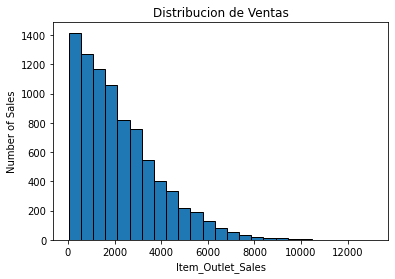

In [ ]:
from numpy.lib.histograms import histogram
#Proyecto 1 - Parte 3
#Crea varias visualizaciones de datos que te ayuden a entender mejor los datos con los que estás trabajando (análisis exploratorio de datos) y que ayude a otras personas entender las tendencias en los datos (análisis explicativo de datos).
#Publica su trabajo en GitHub. 

# El siguiente histograma muestra que la variable de destino, Item_Outlet_Sales, está sesgada a la derecha
# https://aleph.org.mx/como-se-debe-interpretar-la-informacion-de-un-histograma#:~:text=Derecho%20sesgado%3A%20se%20dice%20que,valor%20superior%20(lado%20derecho).

plt.hist(StoreSales.Item_Outlet_Sales, bins=25, edgecolor = 'black')
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Distribucion de Ventas")
plt.show()

#Derecho sesgado: se dice que estos histogramas están sesgados positivamente. Esta distribución tiene un gran número de valores en el lado inferior del eje x (lado izquierdo) y pocos en el valor superior (lado derecho).



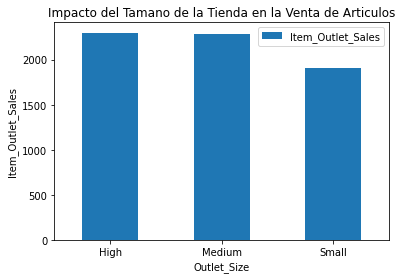

In [40]:

StoreSales.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot(kind='bar', legend='Reverse')
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impacto del Tamano de la Tienda en la Venta de Articulos")
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Impacto del Tamano de la Tienda en la Venta de Articulos')

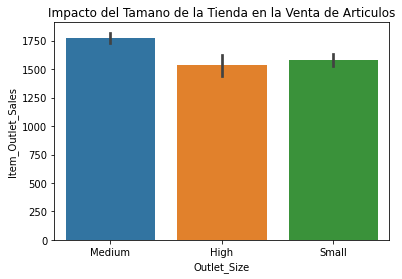

In [46]:

sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", data = StoreSales ,estimator=np.std); # la desviacion estandar como estimador
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impacto del Tamano de la Tienda en la Venta de Articulos")

#  El grafico revela que la tienda de tamano mediano tiene, en promedio, mas ventas.


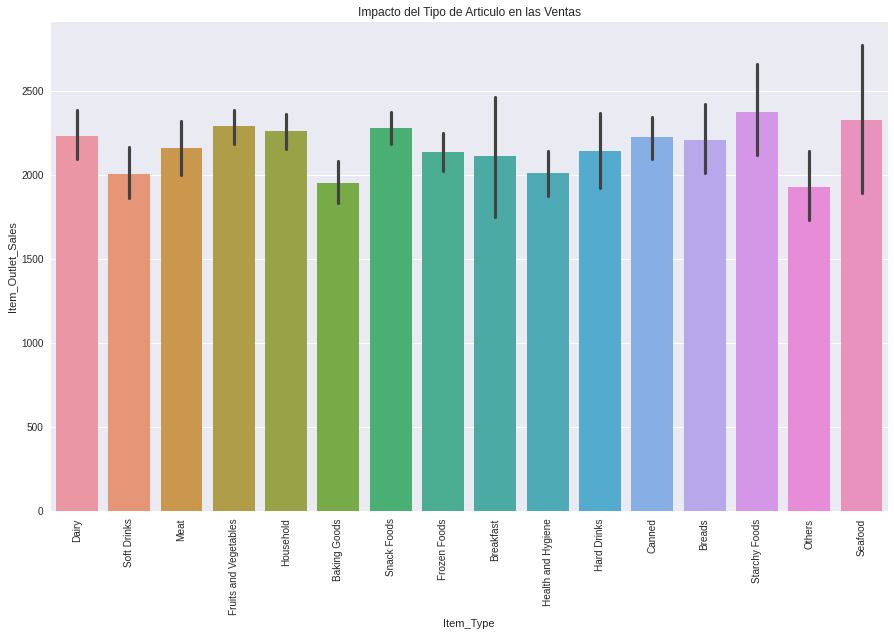

In [60]:


fig, ax = plt.subplots(figsize = (15, 9))
plt.style.use('seaborn-dark')
sns.barplot( x ="Item_Type",  y ="Item_Outlet_Sales", data = StoreSales, ax = ax, estimator = np.mean ); # la media como estimador
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impacto del Tipo de Articulo en las Ventas")
plt.xticks(rotation = 90)
plt.show()